# Observation of all the effects 

The physical model used to describe this effect :

\begin{equation}
    \frac{\partial E}{\partial z} = \frac{i}{2k}\nabla^2_{\bot}E - \frac{\sigma}{2}(1 + i\omega\tau)\rho E - \frac{\beta^K}{2}\left|E\right|^{2K-2}E + i\frac{\omega}{c}(1-f)n_{2}\left|E\right|^2E
\end{equation}

We consider all the effects at the same time to see what happens to the laser:



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#Zoom the figure in matplotlib
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

In [2]:
#Import parameters from python
parameter = np.loadtxt("../results/Total/parameter_total.txt")
Pcr = parameter[0]
k = parameter[1]
K = parameter[2]
L = parameter[3]
N = int(parameter[4])
Lz = parameter[5]
Nz = int(parameter[6])
nb_save = int(parameter[7])
w0 = parameter[8]
p = parameter[9]

#Numerical solution
inten_num = np.loadtxt("../results/Total/intensity_total.txt")
nb_pics = int((inten_num.shape[0]*inten_num.shape[1])/(2*N)**2)
inten_num = inten_num.reshape((nb_pics, 2*N, 2*N))

energy = np.loadtxt("../results/Total/energy_total.txt")
inten_max = np.loadtxt("../results/Total/inten_max_total.txt")

In [3]:
print('Information about the experiment:')
print('Initial condition: ')
print('Wave number: ',np.round(k,2))
print('Multiphoton constant: ',K)
print('Spot size: ',w0)
print('Normalised Pcr: ',Pcr)
print('Pin/Pcr: ',p)
print('Box parameters:')
print('Length of box: ',L)
print('Number of point in x and y: ',2*N)
print('Length of evolution: ',Lz)
print('Number of point z: ',Nz)

Information about the experiment:
Initial condition: 
Wave number:  8107335.88
Multiphoton constant:  7.0
Spot size:  0.0007
Normalised Pcr:  1.61752015309e-07
Pin/Pcr:  35.0
Box parameters:
Length of box:  0.008
Number of point in x and y:  400
Length of evolution:  10.0
Number of point z:  30000


/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


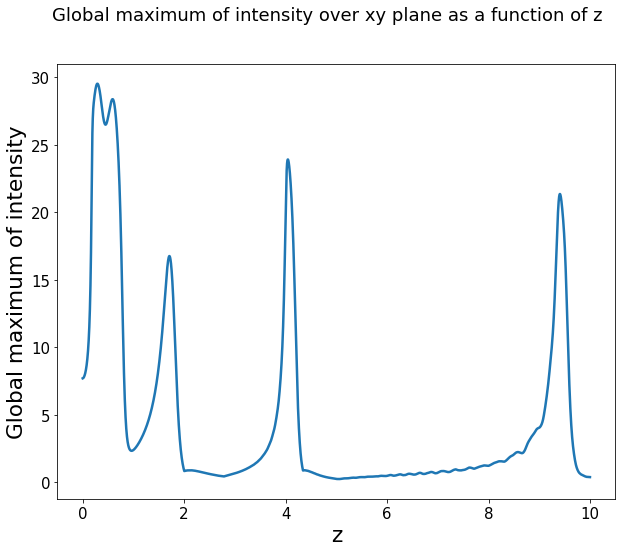

In [4]:
#Energy maximum of laser along z
screen = np.linspace(0, Lz, 30000)

Pcr_const = np.zeros(Nz)
fig, ax = plt.subplots()
ax.plot(screen, inten_max)
#ax.plot(screen, Pcr_const)
ax.set_xlabel('z')
ax.set_ylabel('Global maximum of intensity')
ax.legend()
#plt.xlim(0.007, 0.009)
plt.suptitle('Global maximum of intensity over xy plane as a function of z')
plt.savefig("../figures/global_max_total.png")
fig.show()

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


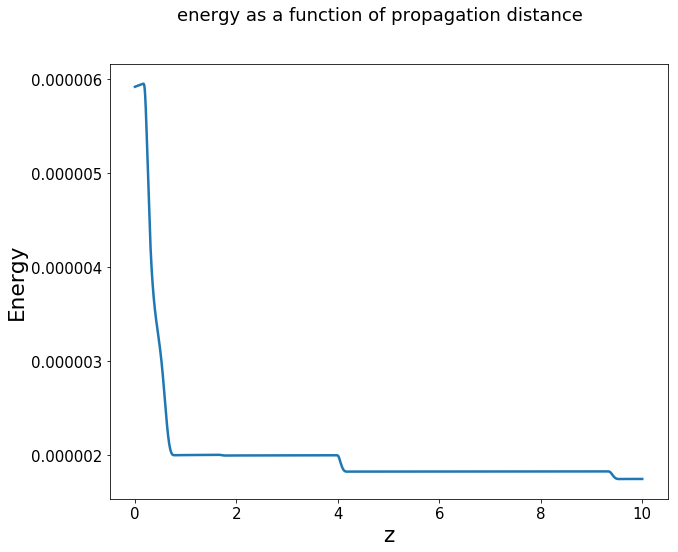

In [5]:
#Total energy of laser along z
screen = np.linspace(0, Lz, Nz)
fig, ax = plt.subplots()
ax.plot(screen, energy)
#ax.plot(screen, Pcr_const)
ax.set_xlabel('z')
ax.set_ylabel('Energy')
ax.legend()
#plt.xlim(0.007, 0.009)
plt.suptitle('energy as a function of propagation distance')
plt.savefig("../figures/energy_total.png")
fig.show()

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


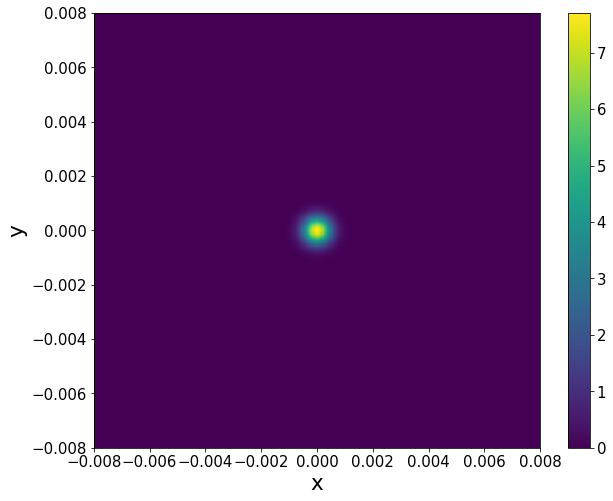

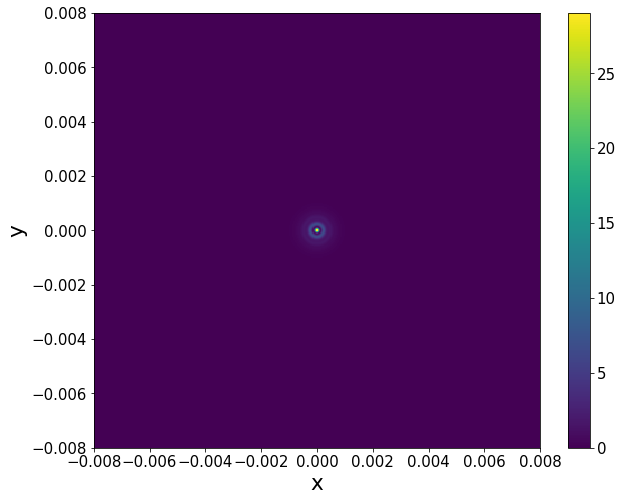

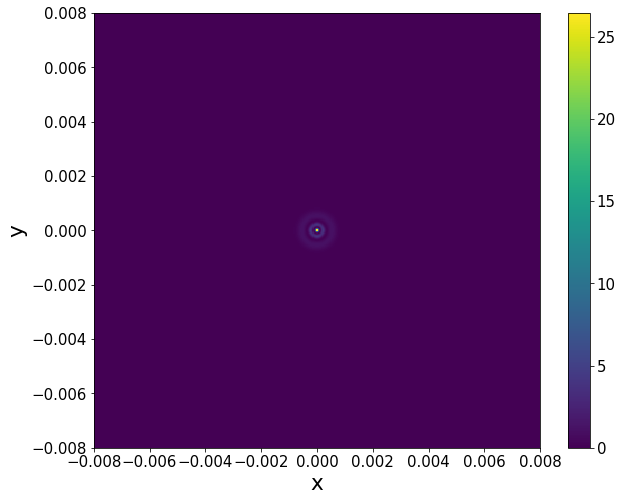

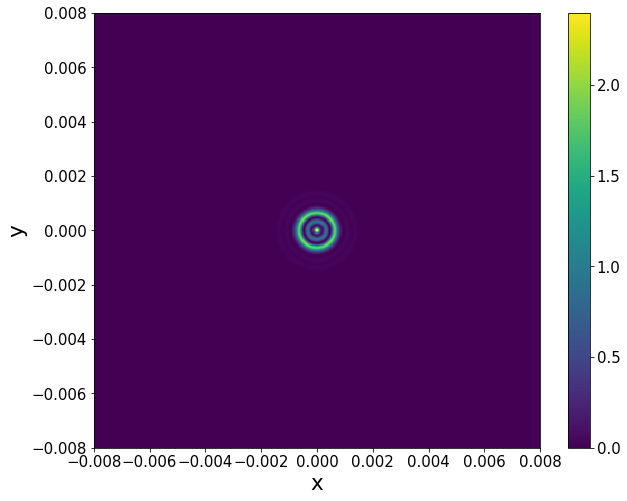

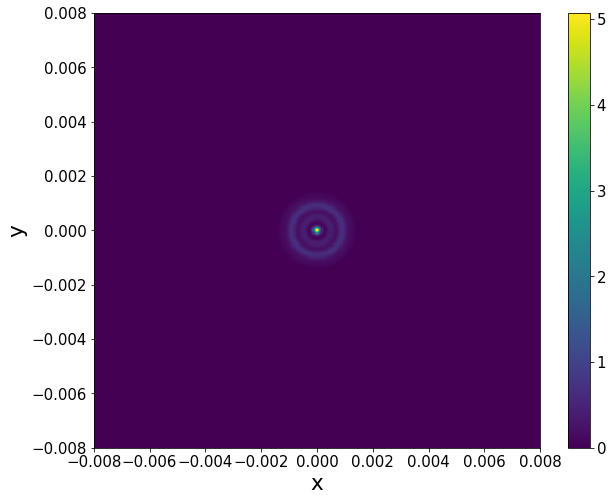

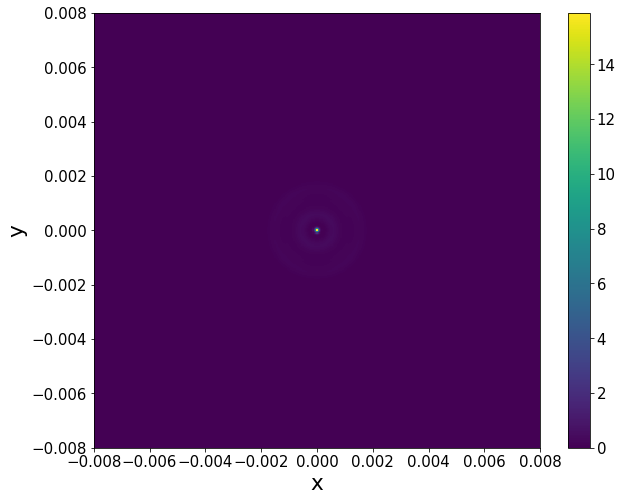

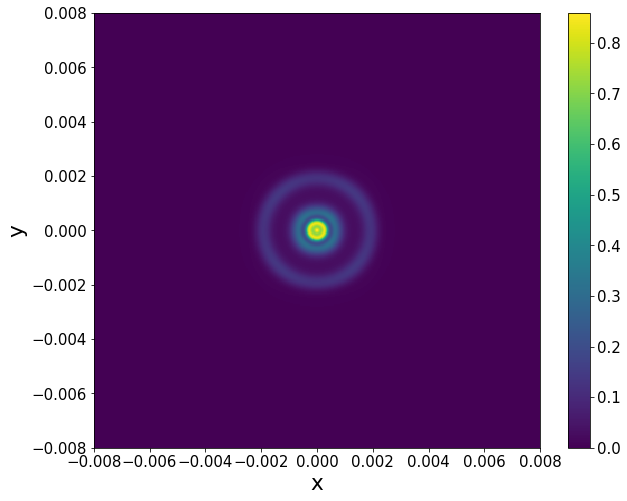

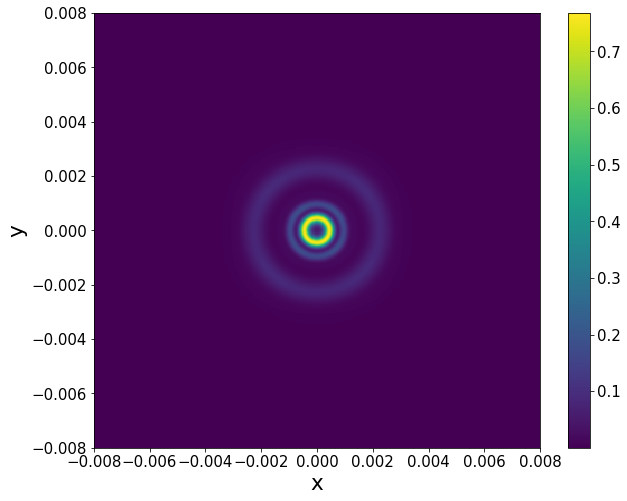

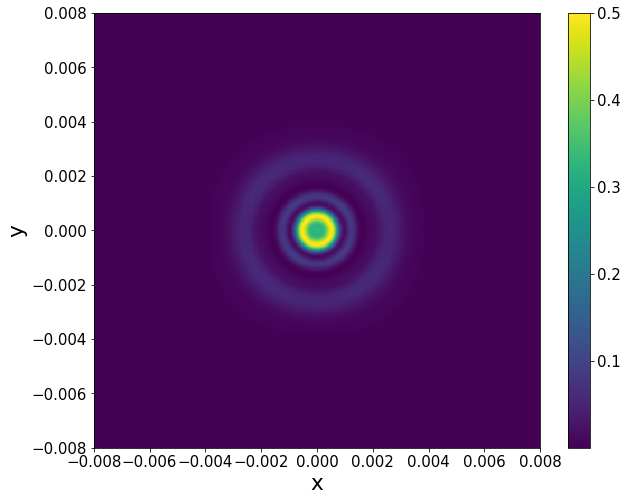

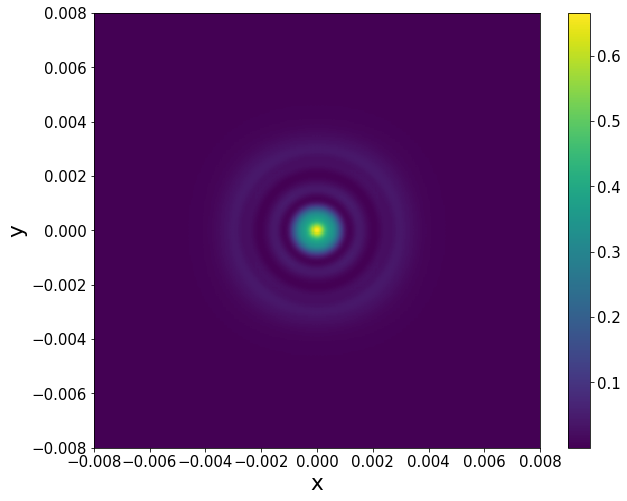

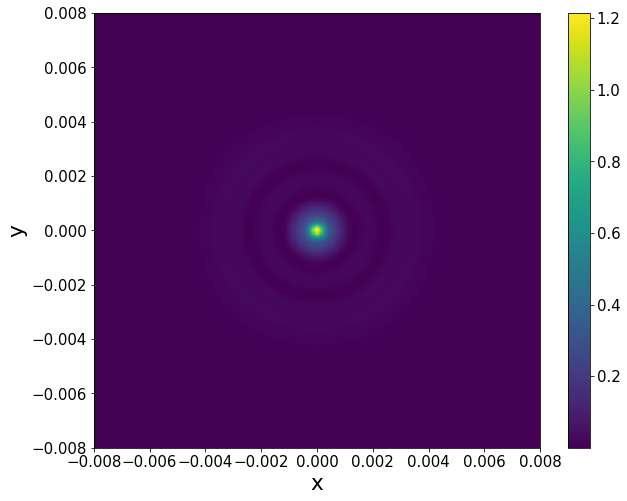

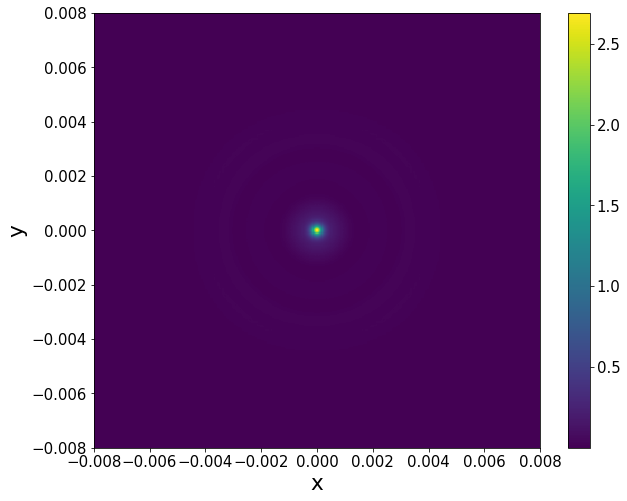

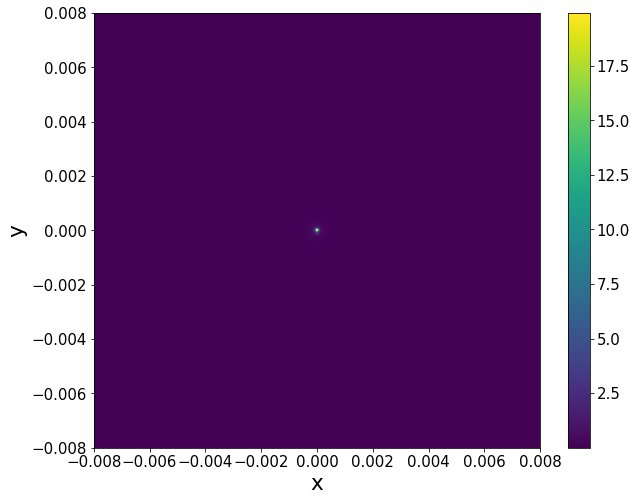

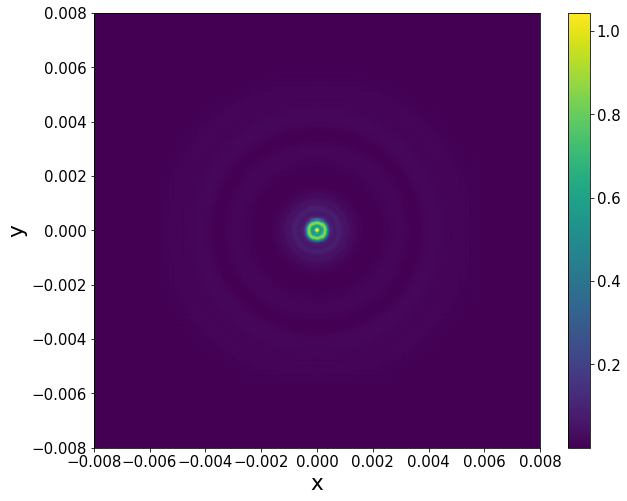

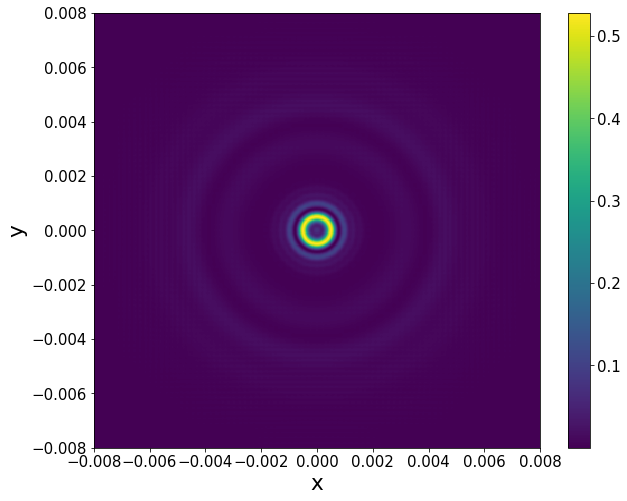

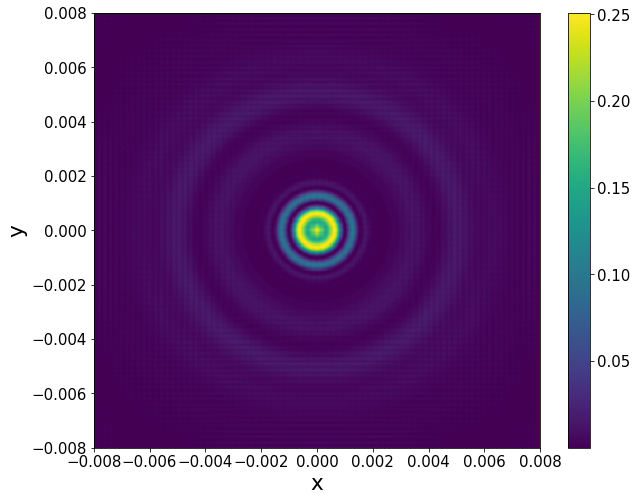

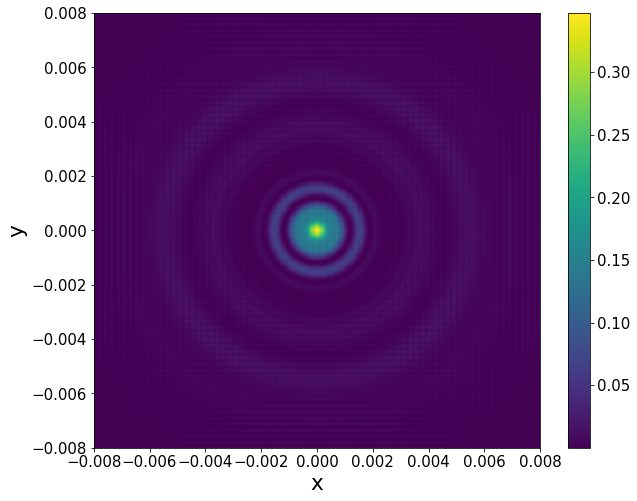

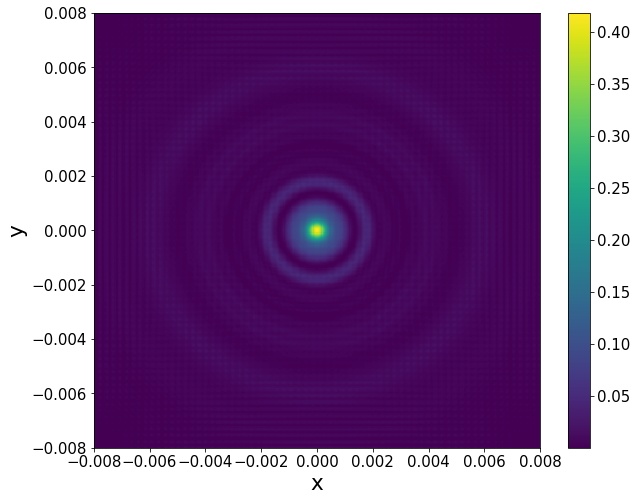

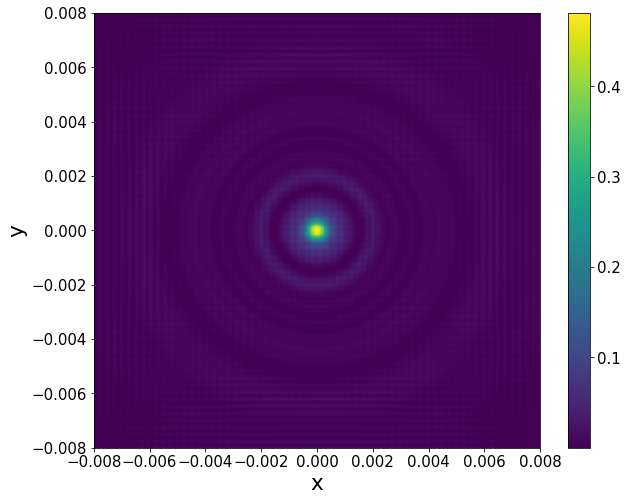

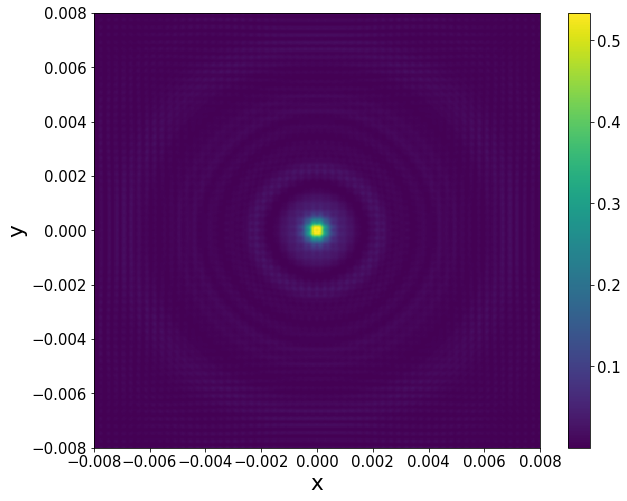

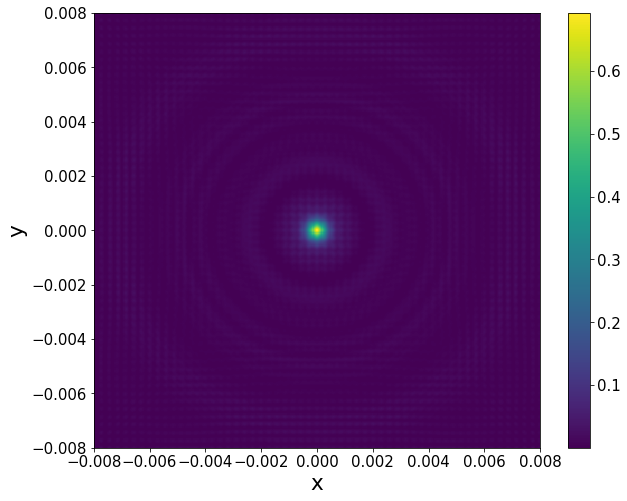

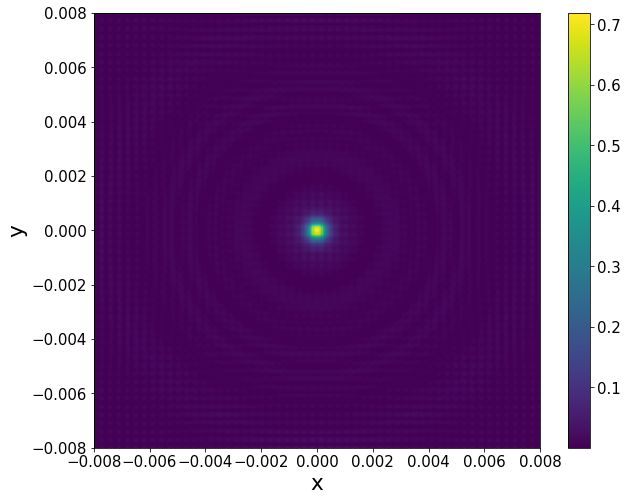

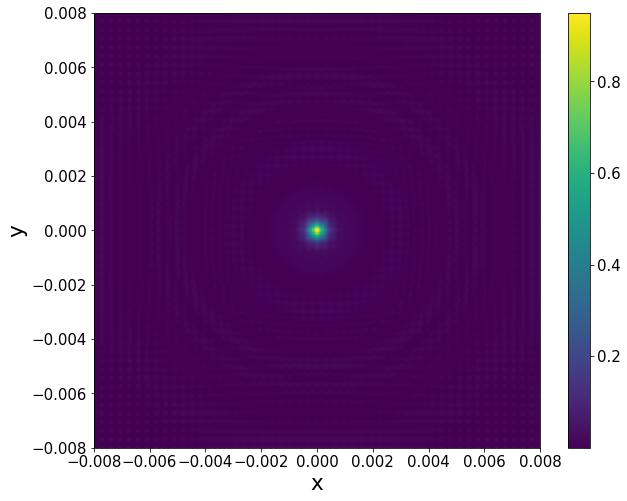

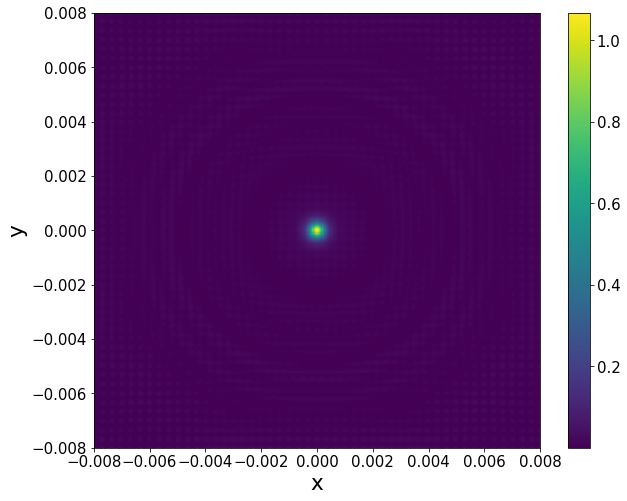

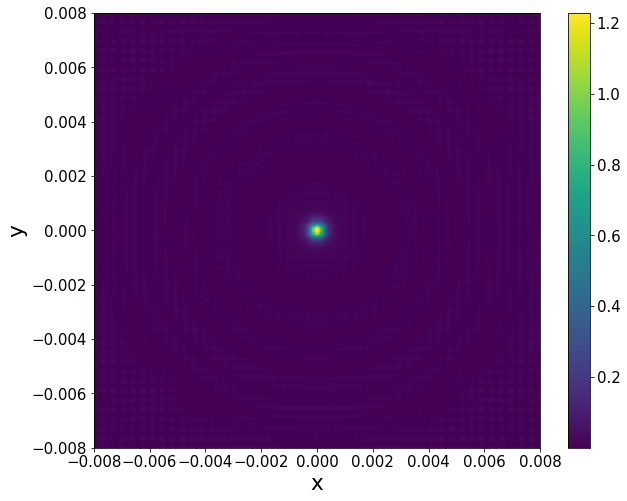

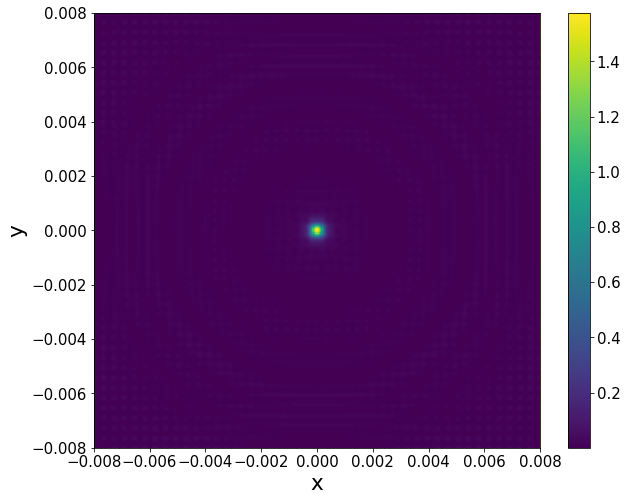

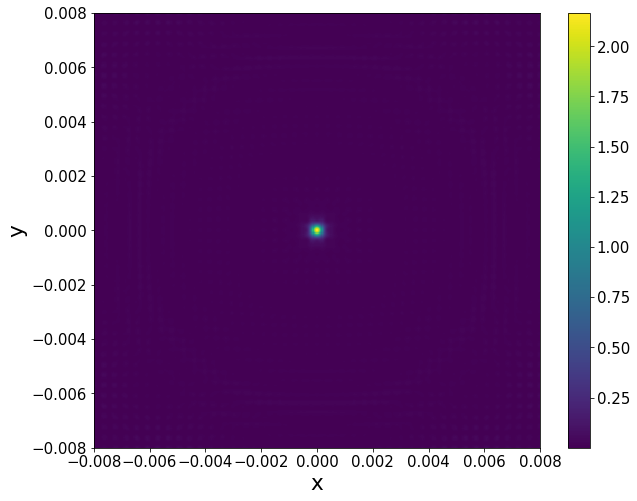

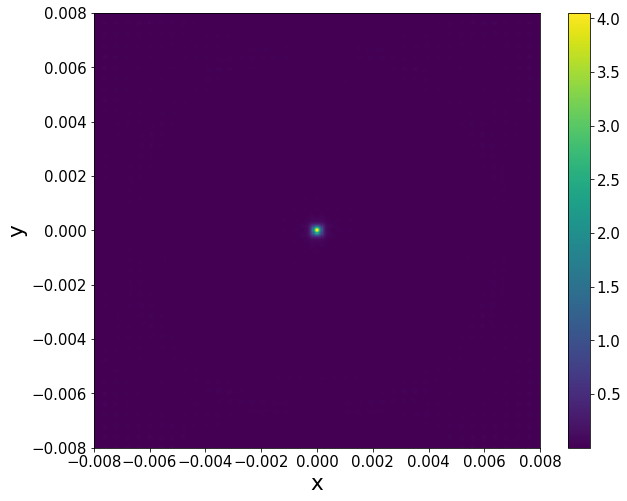

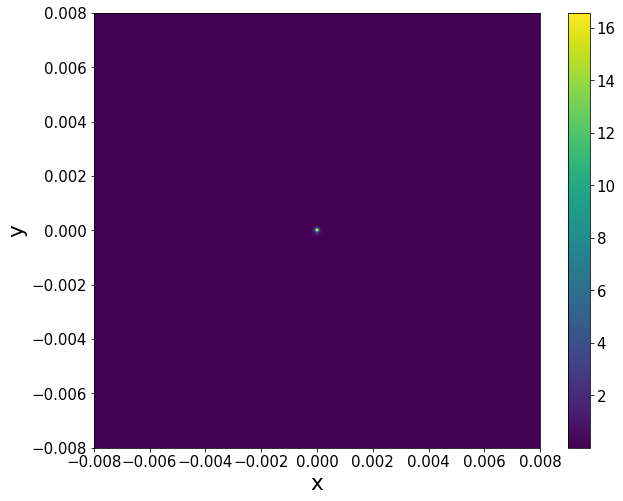

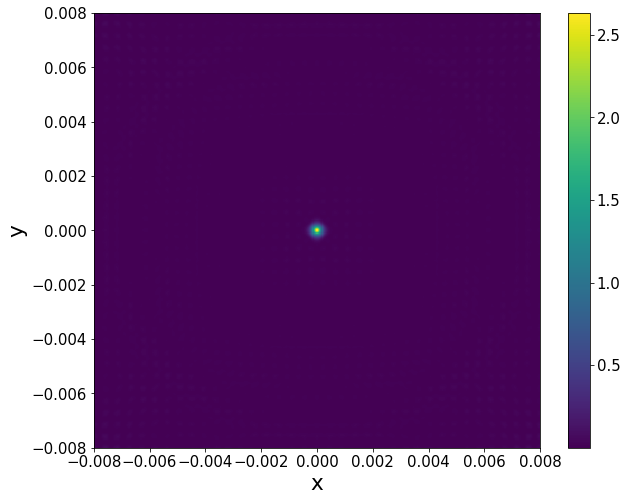

In [6]:
x = np.linspace(-L,L,2*N)
y = np.linspace(-L,L,2*N)
for i in range(inten_num.shape[0]):
        fig, ax = plt.subplots()
        mesh = ax.pcolormesh(x, y, inten_num[i])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.colorbar(mesh, ax=ax)
        #plt.xlim(-0.1*L,0.1*L)
        #plt.ylim(-0.1*L,0.1*L)
        fig.show()

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


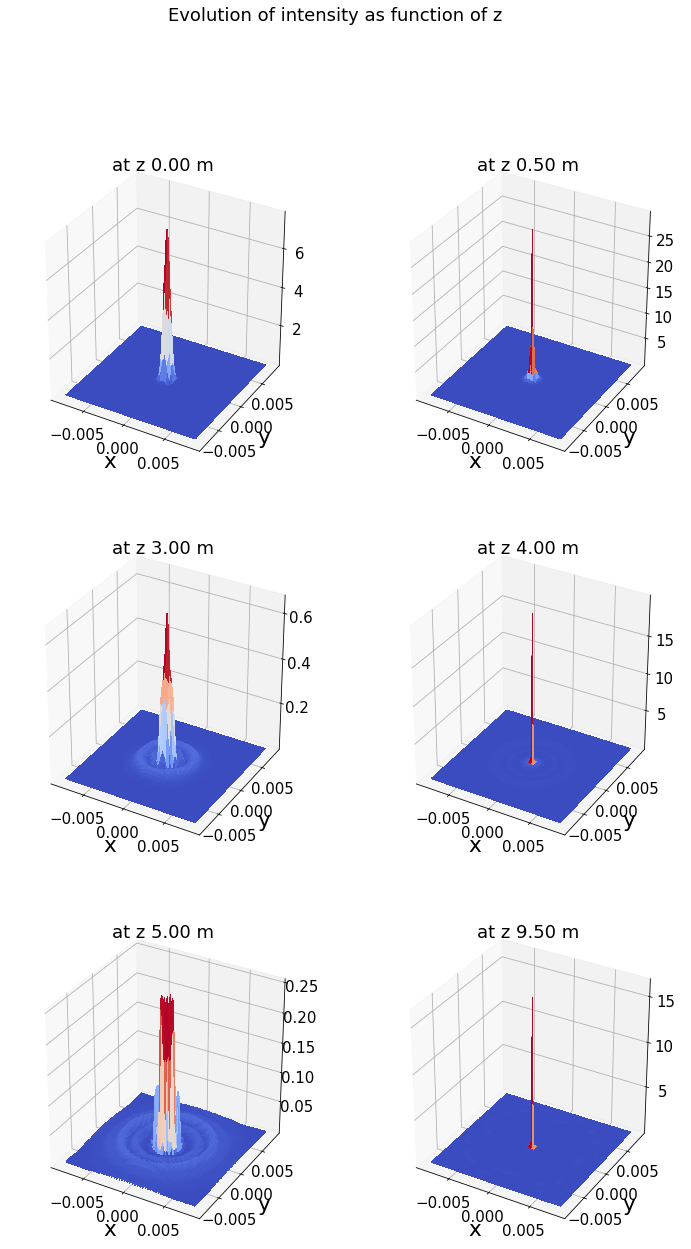

In [7]:
r, d = np.linspace(-L, L, 2*N, retstep=True) 
x, y = np.meshgrid(r,r)

#3D comparison between numerical and analytical solution at arbitary z
axes = []
surfs = []
fig = plt.figure(figsize=plt.figaspect(0.5))

num_pic = inten_num.shape[0]

z_interested = np.array([0, 0.5, 3, 4, 5,9.5])
pos_interested = z_interested*Nz/(nb_save*Lz)
pos_interested = pos_interested.astype(int)

nrow = 3; ncol = 2;
fig = plt.figure(figsize=(12, 20))
axes = []
for i, pos in enumerate(pos_interested): 
    ax = fig.add_subplot(nrow, ncol, i+1, projection='3d')
    axes.append(ax)
    surf = ax.plot_surface(x,y,inten_num[pos_interested[i]],cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('at z %.2f m' %z_interested[i])

fig.suptitle('Evolution of intensity as function of z')
plt.savefig("../figures/evol_intensity_total.png")
fig.show()